In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
best_model = YOLO("runs\\detect\\train\\weights\\best.pt")

In [ ]:
def show_pedictions(img_path):

    results = best_model.predict(source=img_path, show=False, conf=0.5, save=False, verbose=False)

    if isinstance(results, list):

      results = results[0]

    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    bbx_img =original_image.copy()

    cls_name =results.names

    for box in results.boxes:
            
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            
            label_class = int(box.cls)  
            confidence = float(box.conf)
            
            class_name = cls_name.get(label_class, "Unknown")
            # print(class_name)
            label = f"{class_name} ({confidence:.2f})"  
            
            cv2.rectangle(bbx_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            
            text_x = x1   
            text_y = y1 -2
            cv2.putText(
                bbx_img,
                label,
                (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 0, 0),
                1
            )

    plt.figure(figsize=(14, 8))
    

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")
    

    plt.subplot(1, 2, 2)
    plt.imshow(bbx_img)
    plt.title("Image with Bounding Boxes")
    plt.axis("off")
    
    plt.show()


    


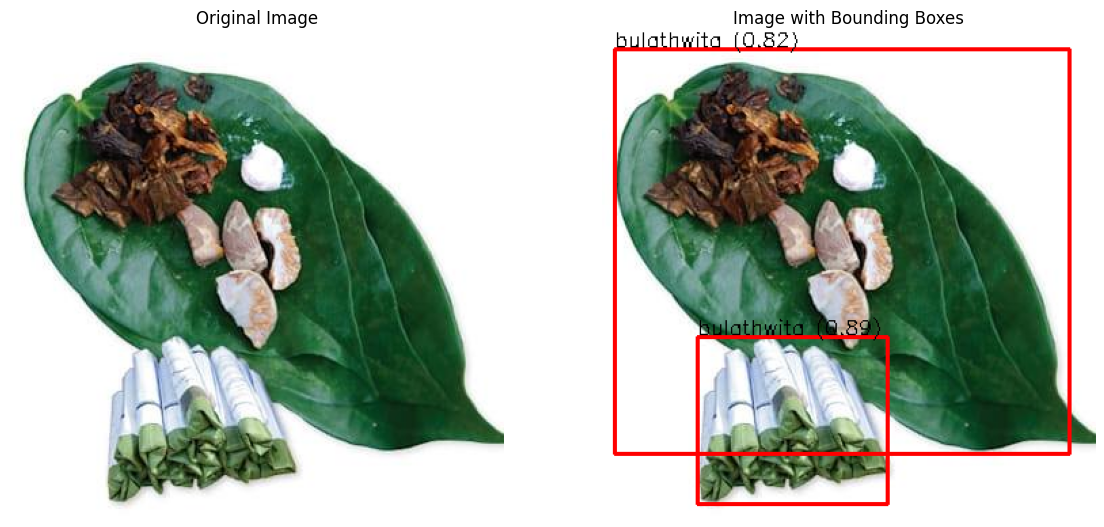

In [13]:
show_pedictions("images\\Bulathwita\\5.jpg")